In [1]:
########## This is some SAGEmath code used during the preparation of the paper
########## “A brute force computer aided proof of an existence result about extremal hyperbolic surfaces”
########## by Ernesto Girondo and Cristian Reyes

########## THE CASE N=11

In [2]:
########## CELL 1: SOME FUNCTIONS

########## FUNCTION poli2pi3. Edges, vertices and midpoints of a regular polygon of n edges
def poli2pi3(n):
    u'''This is a function of an integer n. The output is a triplet consisting of the n edges, the n vertices 
    and the n edge midpoints of a regular hyperbolic polygon of angle 2Pi/3 centered at the origin. Points and vertices 
    are listed in counterclockwise order. The first midpoint, which lies in the negative imaginary axis, 
    corresponds to the last edge. 
    '''
    H=N(arccosh(1/(tan((pi)/n)*tan((pi)/3))))
    h=N(tanh(H/2))
    R=N(arccosh((cos((pi)/3))/(sin((pi/n)))))
    r=N(tanh(R/2))
    puntosmedios=[N(r*(cos(3*(pi)/2+2*k*pi/n))+I*r*(sin(3*(pi)/2+2*k*pi/n))) for k in [0..n-1]]
    vertices=[N(h*(cos(3*(pi)/2+(1+2*k)*pi/n))+h*(sin(3*(pi)/2+(1+2*k)*pi/n))*I) for k in [0..n]]
    lados = [PD.get_geodesic(vertices[k], vertices[k+1]) for k in [0..n-1]]
    return lados, vertices, puntosmedios
#####



##### FUNCTION   moverpol returns a plot of the image of the list of edges "lados", which is a global variable
def moverpol(x, col):
    u'''This is a function of a transformation x and a color col. The output is a plot in color col of the image of the 
    set "lados", which is a global variable.
    '''
    global lados
    bpol=Graphics()
    for j in [0..M-1]:
        movido=x*lados[j]
        bpol+=movido.show(color=col)
    return bpol
#####

In [3]:
########## CELL2: SOME CODE DEFINING THE GENERATORS OF A TRIANGLE GROUP (2,3,M) and related things


PD=HyperbolicPlane().PD() #The Disc model of the hyperbolic plane

M=11  #The number of edges of the polygons. This is called N in the paper

lados, vertices, puntosmedios = poli2pi3(M) #

#Now computing the points A,B,C and the three generators a,b,c of the extended triangle group (2,3,M)
H=N(arccosh(1/(tan((pi)/M)*tan((pi)/3))))
h=N(tanh(H/2))
R=N(arccosh((cos((pi)/3))/(sin((pi)/M))))
r=N(tanh(R/2))
LM=N(arccosh((cos((pi)/M))/(sin((pi)/3))))
L=2*LM
l=N(tanh(L/2))

B=PD.get_point(0+0*I)
C=PD.get_point(N(r*cos((pi)*3/2)+r*sin((pi)*3/2)*I))
A=PD.get_point(N(h*cos((pi)/M+3*(pi)/2)+h*sin((pi)/M+3*(pi)/2)*I))
lado_c, lado_b, lado_a =PD.get_geodesic(A,B),PD.get_geodesic(A,C), PD.get_geodesic(B,C)
a,b,c=lado_a.reflection_involution(), lado_b.reflection_involution(), lado_c.reflection_involution()

In [4]:
########## CELL3: OTHER USEFUL FUNCTIONS

def Rota(t):
    return (c*a)^t*a*b

def rotasionpi(p,q): #THE ORDER 2 ELLIPTIC ELEMENT PERMUTING TWO GIVEN POINTS p AND q
    ek1=PD.get_point(p)
    ek2=PD.get_point(q)
    geod=PD.get_geodesic(ek1,ek2)
    ek3=geod.midpoint().coordinates()
    ma1=matrix([[I,(ek3)*(-I)],[(ek3.conjugate())*(I),-I]])
    Rot=PD.get_isometry(ma1)
    rotpii=matrix([[I,0],[0,-I]])
    rotpi=PD.get_isometry(rotpii)
    fuu=Rot*rotpi*Rot^-1
    return fuu

def G0(i):
    return a*b*(c*a)^i*a*b
def G1(i):
    return (c*a)*a*b*(c*a)^i*a*b*(c*a)^-1
def G2(i):
    return (c*a)^2*a*b*(c*a)^i*a*b*(c*a)^-2
def G3(i):
    return (c*a)^3*a*b*(c*a)^i*a*b*(c*a)^-3
def G4(i):
    return (c*a)^4*a*b*(c*a)^i*a*b*(c*a)^-4
def G5(i):
    return (c*a)^5*a*b*(c*a)^i*a*b*(c*a)^-5

/Applications/SageMath-8.2.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:31: DeprecationWarning: show is deprecated. Please use plot instead.
See http://trac.sagemath.org/20530 for details.


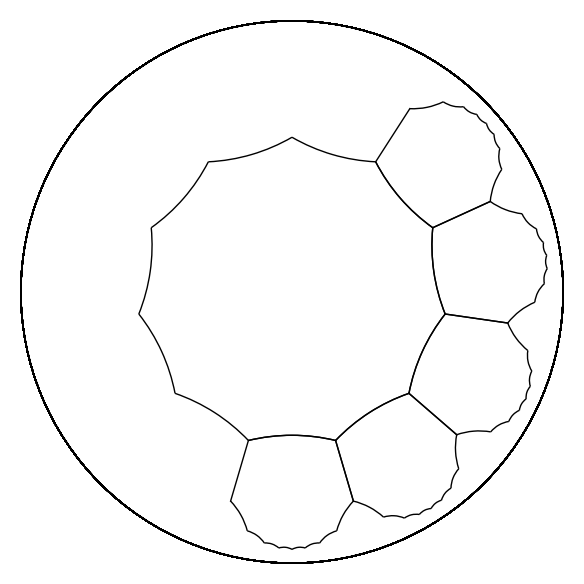

In [5]:
########## CELL4: plotdom IS THE FUNDAMENTAL DOMAIN F DESCRIBED IN THE TEXT AND sidepairings ARE THE SET
########## OF SIDE PAIRING TRANSFORMATIONS GENERATING THE GROUP K

plotdom=moverpol(a*a^-1,'black')
for k in [0..4]:
    plotdom=plotdom+moverpol((c*a)^k*a*b,'black')
    
show(plotdom)

sidepairings=['comodin']
sidepairingscode=['cero']

sidepairings.append((c*a)^-4*b*(c*a))                               #1 Side pairing (-, 1_{10}, 1_7)
sidepairingscode.append('(-, 1_{10}, 1_7)')
sidepairings.append(G2(5)*(c*a)^-3)                                 #2 Side pairing (+, 1_5, 4_5)
sidepairingscode.append('(+, 1_5, 4_5)')
sidepairings.append(G0(1)*a*(c*a)^3)                                #3 Side pairing (-, 1_8, 2_1)
sidepairingscode.append('(-, 1_8, 2_1)')
sidepairings.append(G2(6)*(c*a)^-2*(c*a)^4*a*b*(c*a)^-4*G4(1))      #4 Side pairing (+, 6_{10}, 4_6)
sidepairingscode.append('(+, 6_{10}, 4_6)')
sidepairings.append(G3(-3)*(c*a)^-3)                                #5 Side pairing (+, 1_6, 5_8)
sidepairingscode.append('(+, 1_6, 5_8)')
sidepairings.append(G3(-4)*(c*a)^3*a*(c*a)^2)                       #6 Side pairing (-, 1_9, 5_7)
sidepairingscode.append('(-, 1_9, 5_7)')
sidepairings.append(G3(-3)*G2(6))                                   #7 Side pairing (+, 4_4, 5_9)
sidepairingscode.append('(+, 4_4, 5_9)')
sidepairings.append(G4(2)*(c*a)^2*(c*a)^2*a*b*(c*a)^-2*G2(-3))      #8 Side pairing (+, 4_3, 6_2)
sidepairingscode.append('(+, 4_3, 6_2)')
sidepairings.append(G3(-5)*(c*a)^3*a*b*G0(-2))                      #9 Side pairing (+, 2_2, 5_6)
sidepairingscode.append('(+, 2_2, 5_6)')
sidepairings.append(G0(-2)*a*b*G0(6))                               #10 Side pairing (+, 2_5, 2_9)
sidepairingscode.append('(+, 2_5, 2_9)')
sidepairings.append(G1(2)*(c*a)*a*b*G0(-4))                         #11 Side pairing (+, 2_4, 3_2)
sidepairingscode.append('(+, 2_4, 3_2)')
sidepairings.append(G1(-4)*(c*a)*b*G0(-3))                          #12 Side pairing (-, 2_3, 3_7)
sidepairingscode.append('(-, 2_3, 3_7)')
sidepairings.append(G3(5)*(c*a)^2*(c*a)*b*(c*a)^-1*G1(-6))          #13 Side pairing (-, 3_6, 5_5)
sidepairingscode.append('(-, 3_6, 5_5)')
sidepairings.append(G1(8)*(c*a)*b*(c*a)^-1*G1(-3))                  #14 Side pairing (-, 3_3, 3_8)
sidepairingscode.append('(-, 3_3, 3_8)')
sidepairings.append(G4(6)*(c*a)^2*(c*a)^2*b*(c*a)^-2*G2(-2))        #15 Side pairing (-, 4_2, 6_6)
sidepairingscode.append('(-, 4_2, 6_6)')
sidepairings.append(G4(5)*(c*a)^3*(c*a)*b*(c*a)^-1*G1(-9))          #16 Side pairing (-, 3_9, 6_5)
sidepairingscode.append('(-, 3_9, 6_5)')
sidepairings.append(G4(3)*(c*a)^4*b*(c*a)^-4*G4(-7))                #17 Side pairing (-, 6_7, 6_3)
sidepairingscode.append('(-, 6_7, 6_3)')
sidepairings.append(G4(4)*(c*a)^3*(c*a)*a*b*(c*a)^-1*G1(-4))        #18 Side pairing (+, 3_4, 6_4)
sidepairingscode.append('(+, 3_4, 6_4)')
sidepairings.append(G4(8)*(c*a)^3*(c*a)*b*(c*a)^-1*G1(-5))          #19 Side pairing (-, 3_5, 6_8)
sidepairingscode.append('(-, 3_5, 6_8)')
sidepairings.append(G4(9)*(c*a)*(c*a)^3*a*b*(c*a)^-3*G3(-4))        #20 Side pairing (+, 5_4, 6_9)
sidepairingscode.append('(+, 5_4, 6_9)')
sidepairings.append(G3(3)*(c*a)*(c*a)^2*a*b*(c*a)^-2*G2(-7))        #21 Side pairing (+, 4_7, 5_3)
sidepairingscode.append('(+, 4_7, 5_3)')
sidepairings.append(G3(2)*(c*a)^3*a*b*G0(-7))                       #22 Side pairing (+, 2_7, 5_2)
sidepairingscode.append('(+, 2_7, 5_2)')
sidepairings.append(G2(9)*(c*a)^2*a*b*G0(-8))                       #23 Side pairing (+, 2_8, 4_9)
sidepairingscode.append('(+, 2_8, 4_9)')
sidepairings.append(G2(8)*(c*a)^2*a*b*G0(-6))                       #24 Side pairing (+, 2_6, 4_8)
sidepairingscode.append('(+, 2_6, 4_8)')


/Applications/SageMath-8.2.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:31: DeprecationWarning: show is deprecated. Please use plot instead.
See http://trac.sagemath.org/20530 for details.


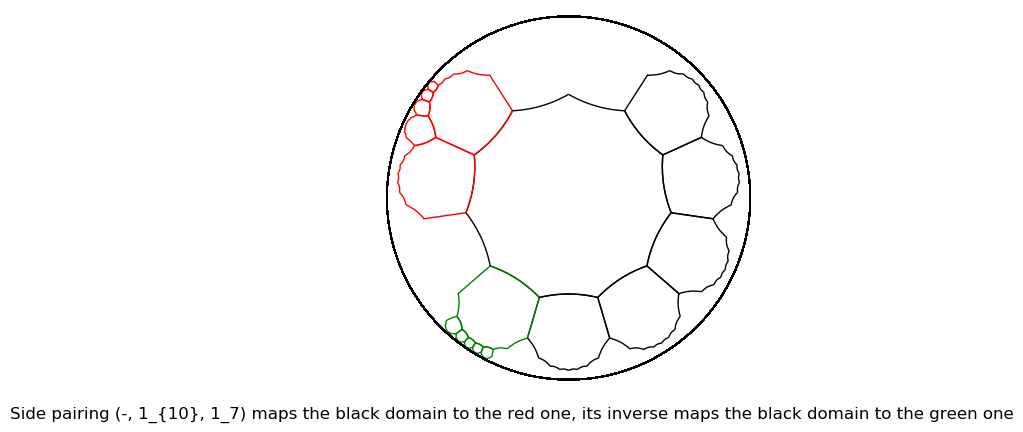

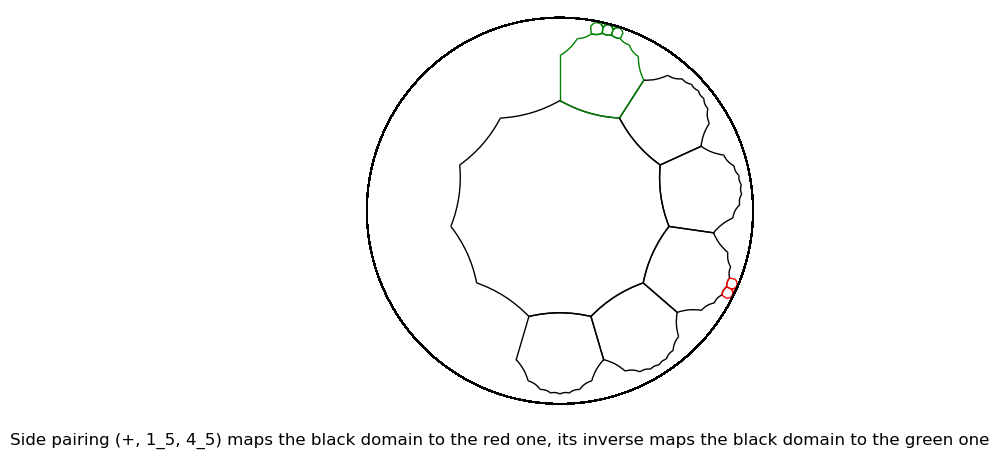

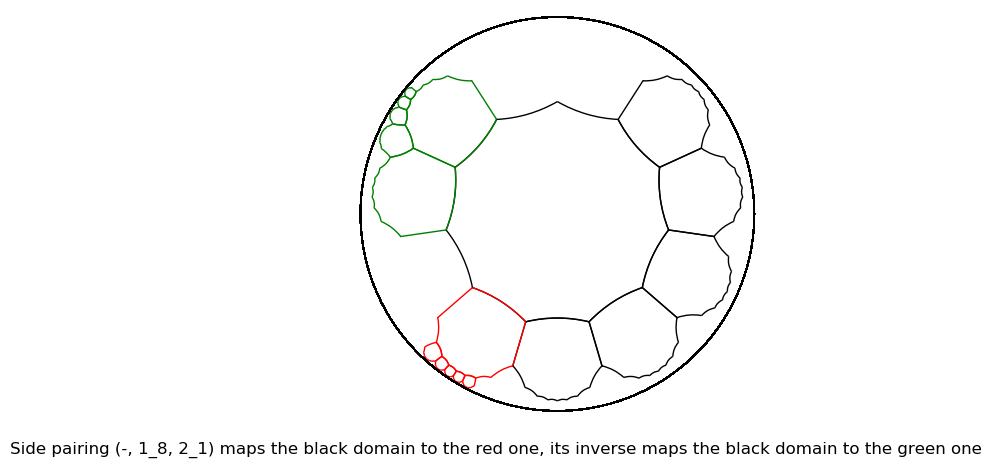

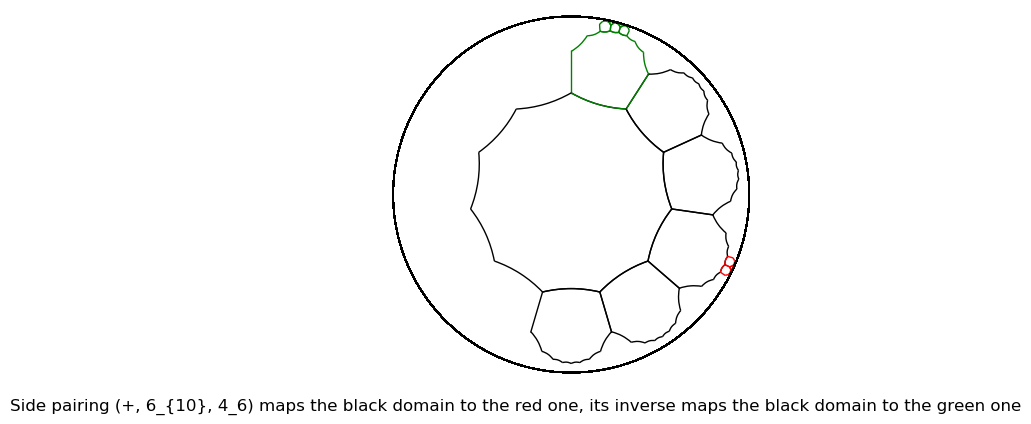

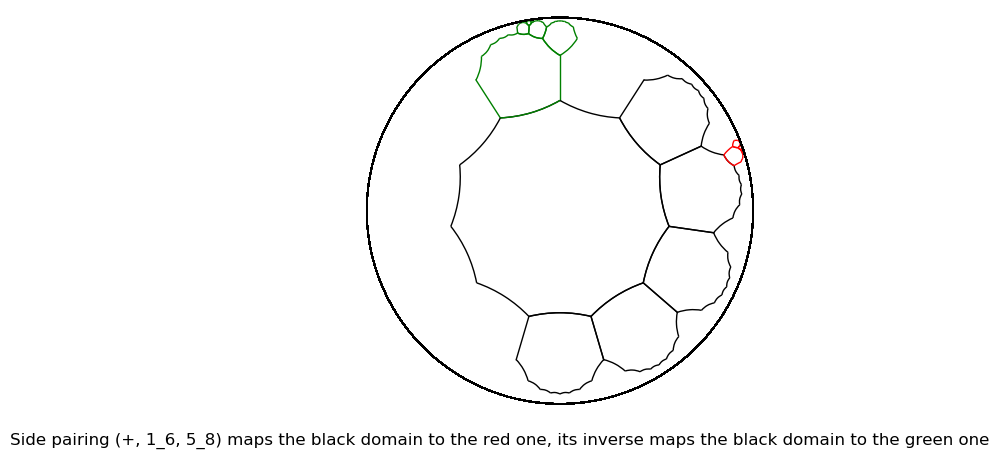

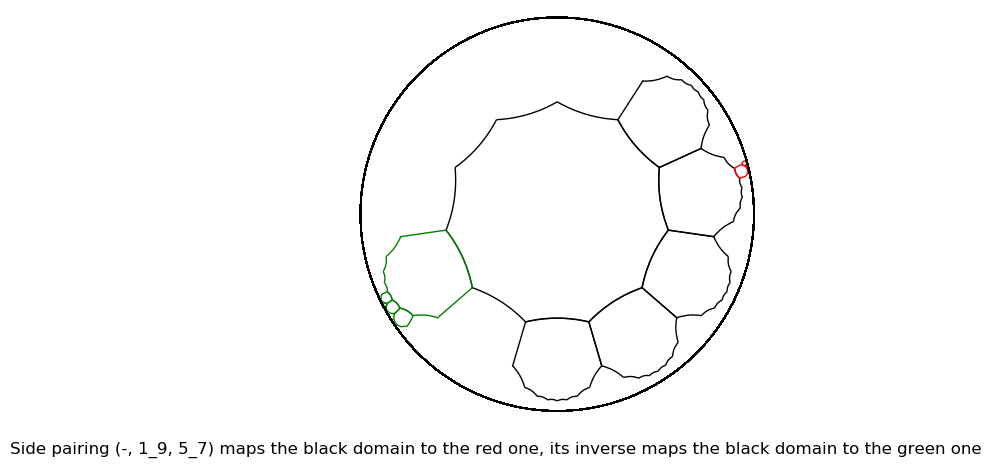

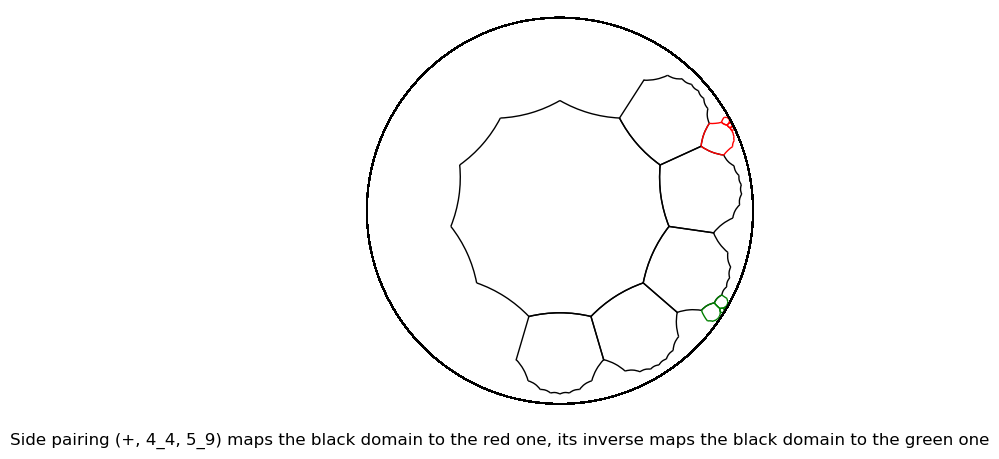

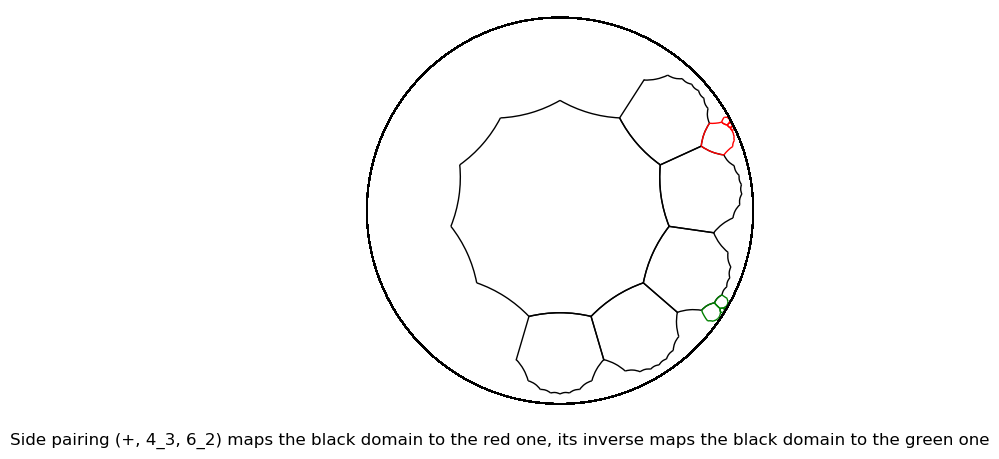

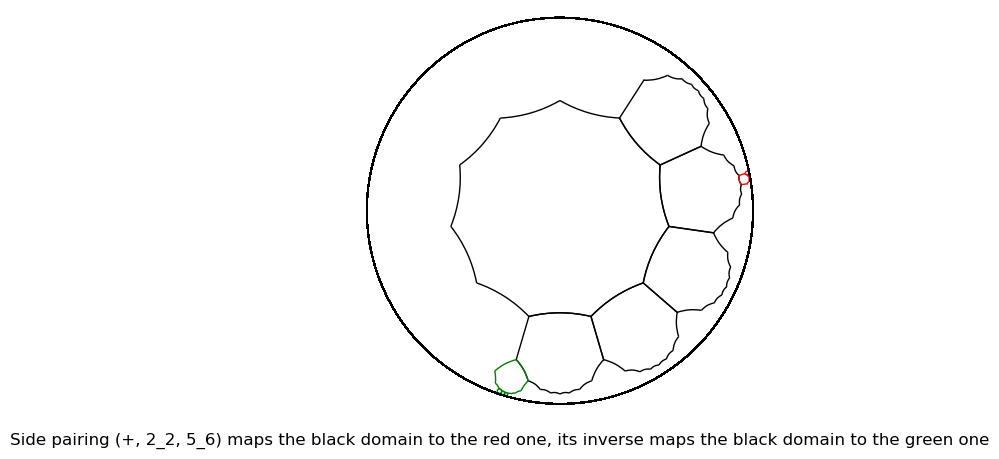

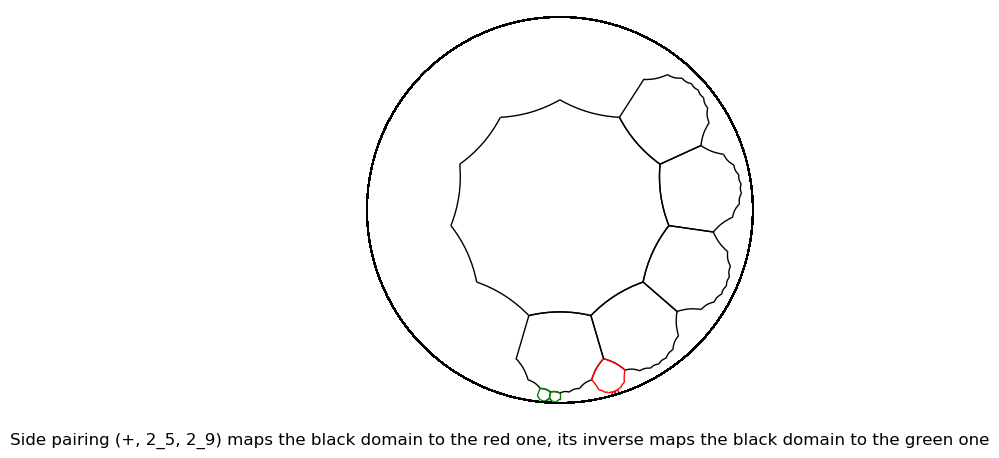

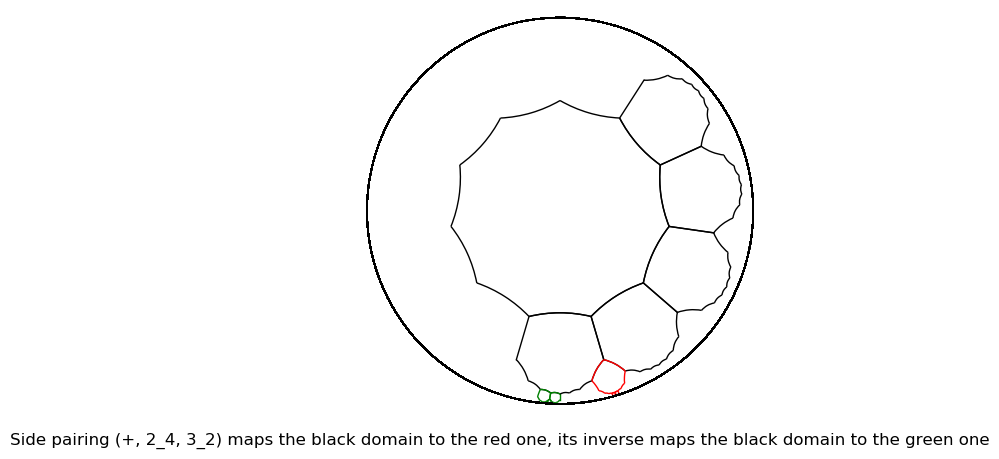

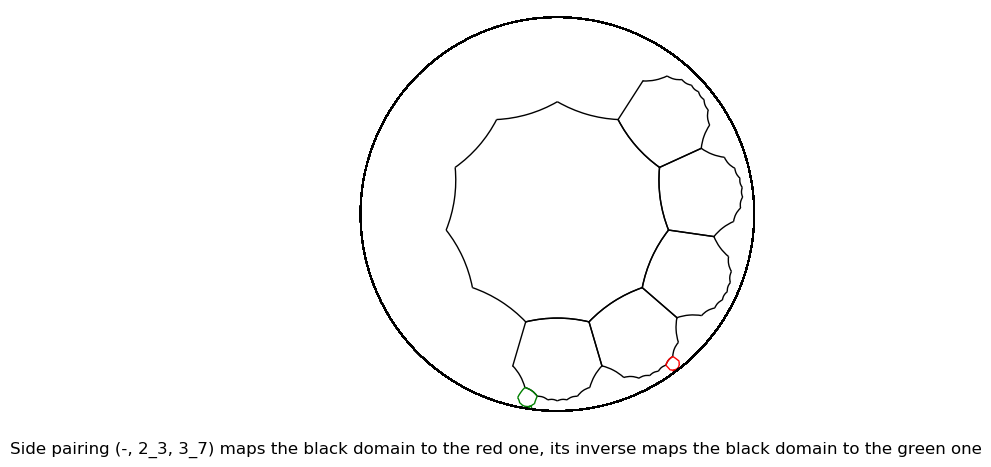

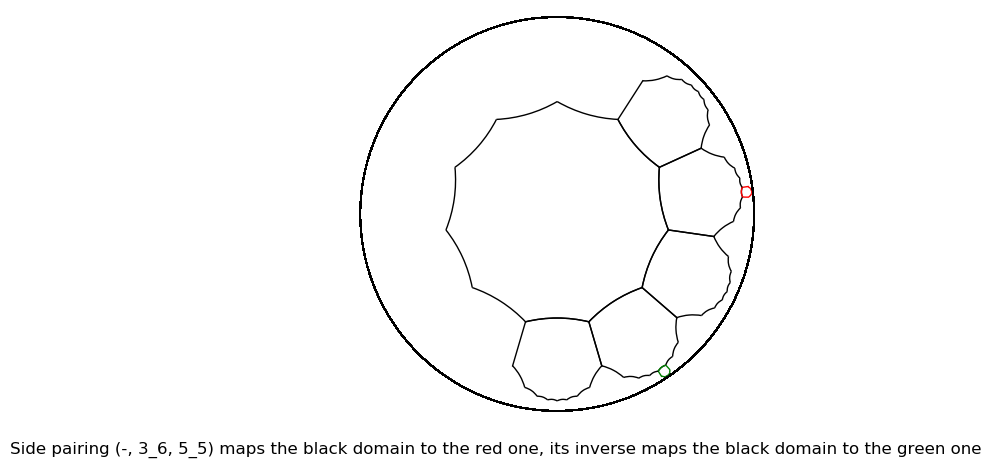

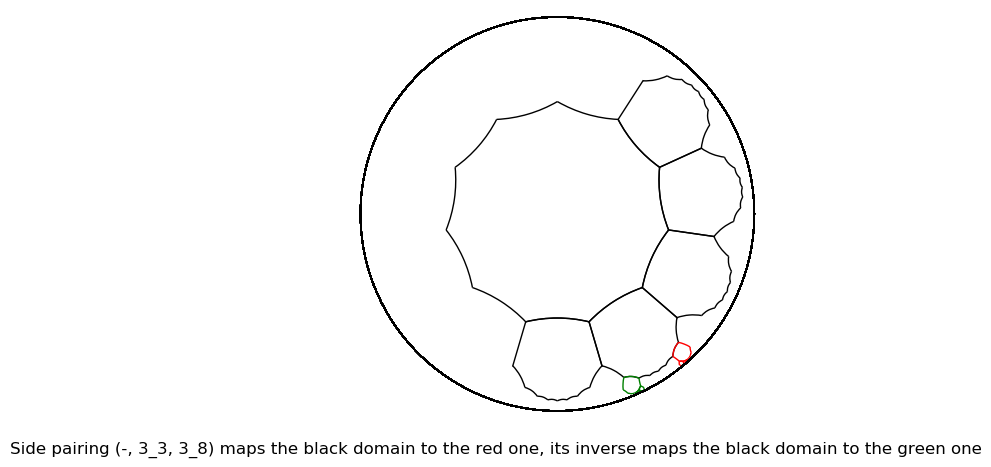

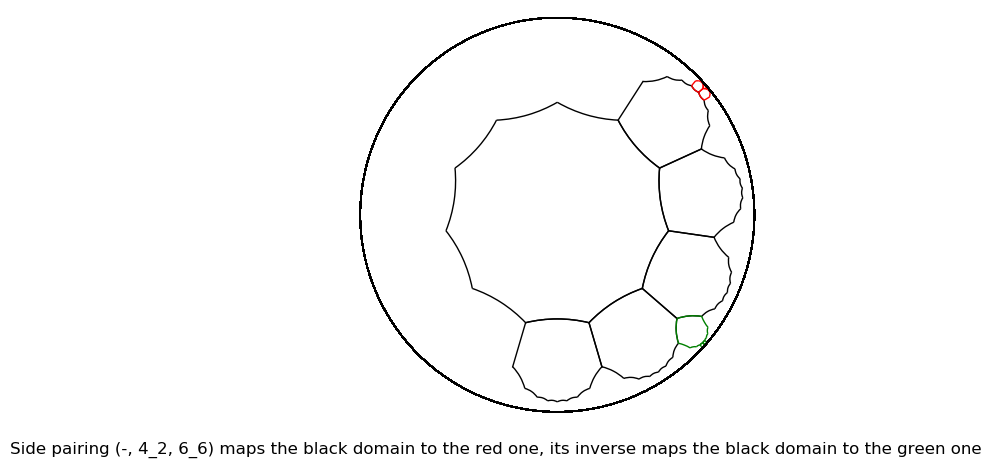

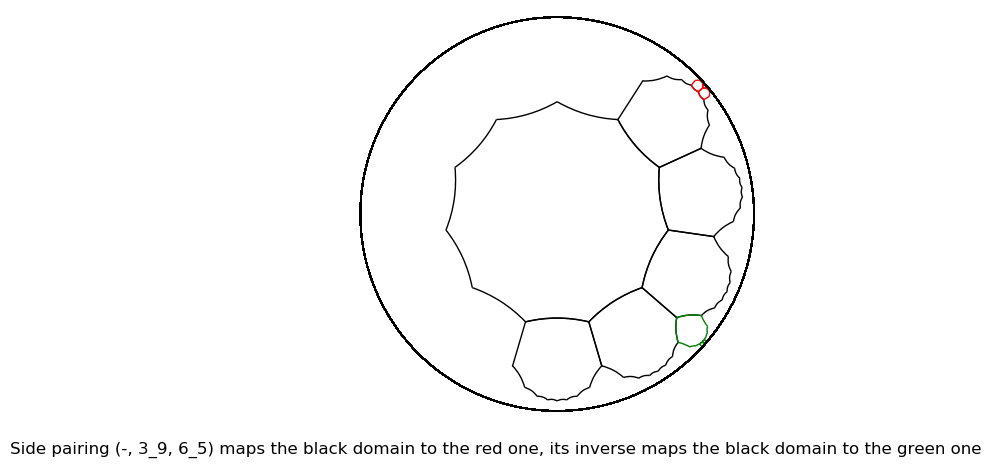

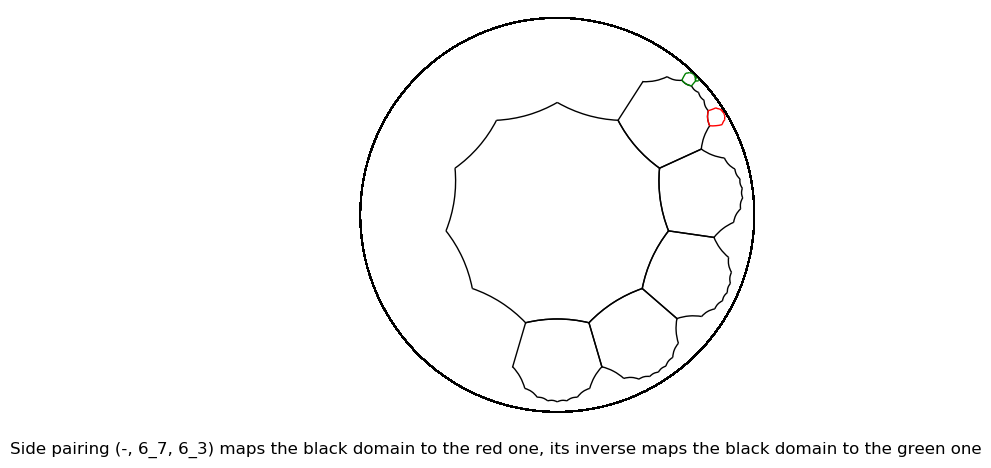

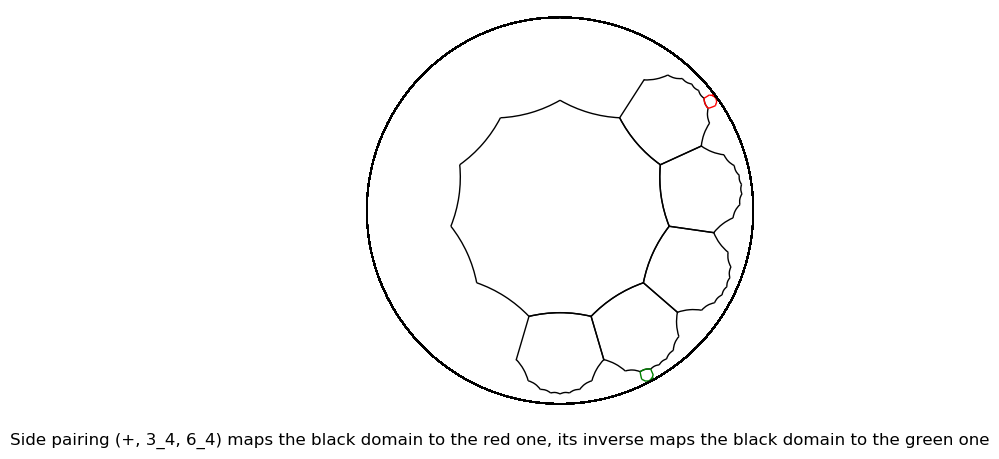

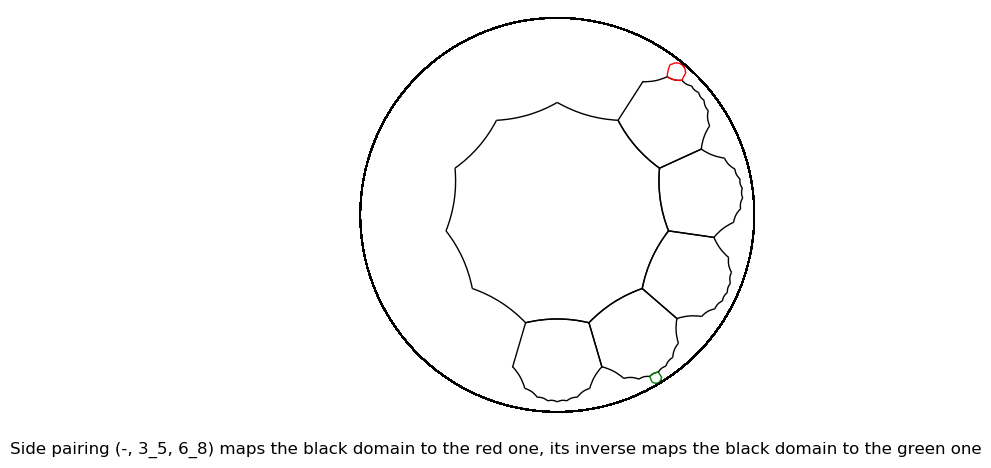

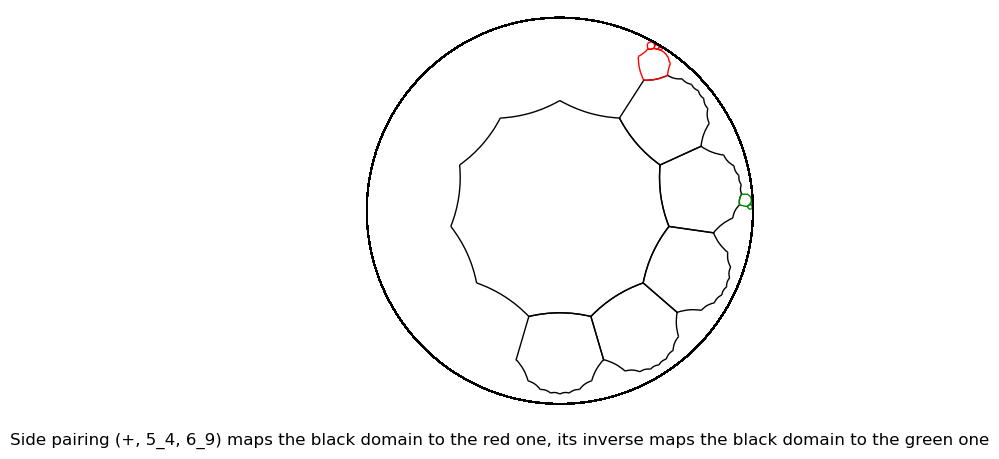

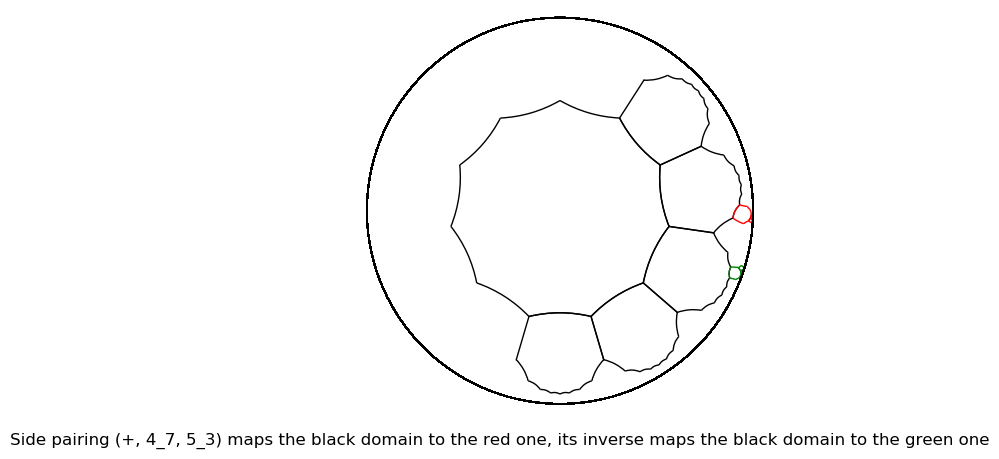

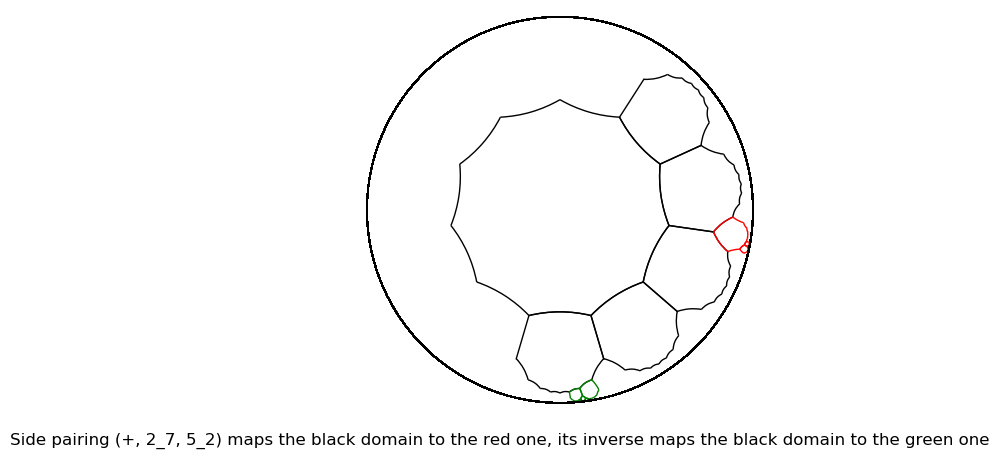

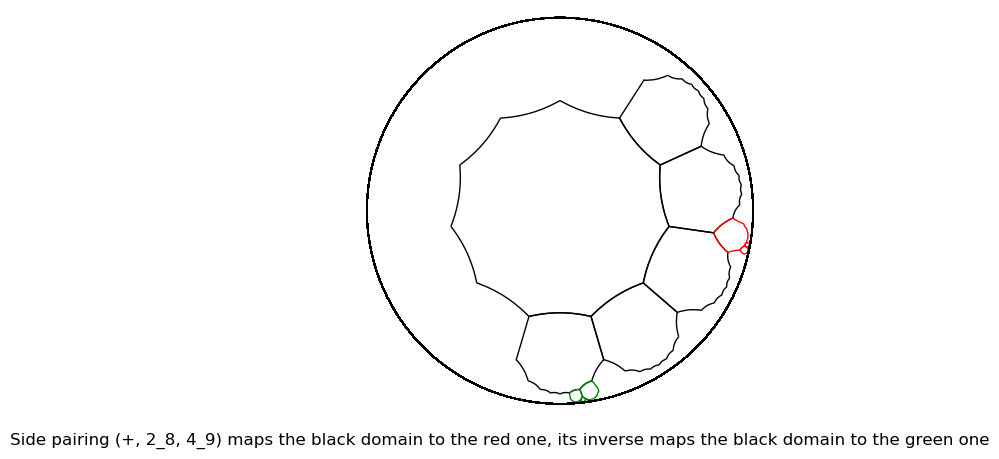

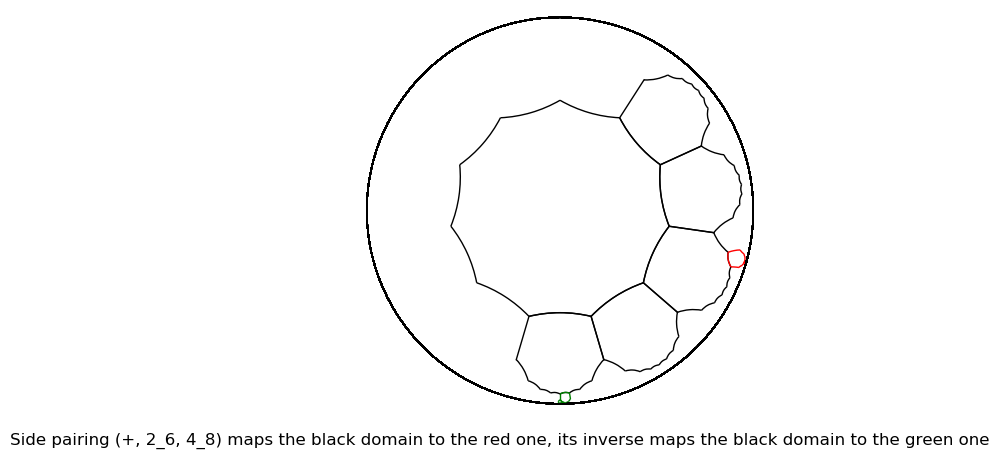

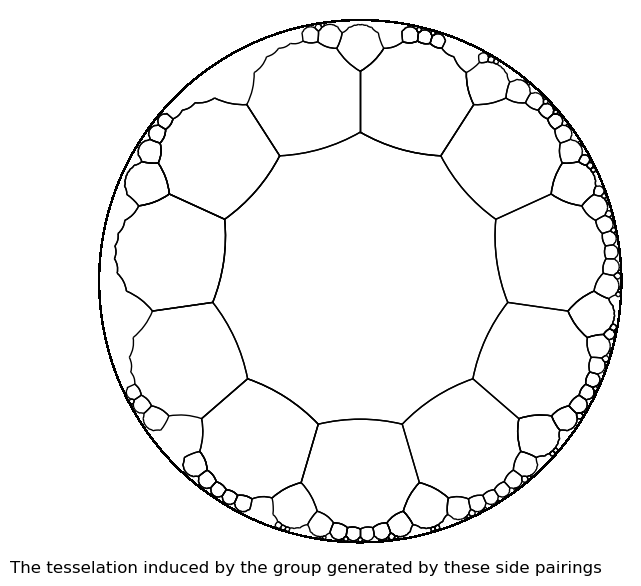

In [6]:
########## CELL 5: USE IT IF YOU WANT TO CHECK GRAPHICALLY HOW OUR SIDE PAIRINGS ACT. 
########## THE IMAGE OF plotdom (THE FUNDAMENTAL DOMAIN F) BY THE SIDE PAIRING IS DEPICTED IN RED. 
########## THE IMAGE BY THE INVERSE IS DEPICTED IN GREEN.
########## THE SIDE PAIRING MAPS THE GREEN EDGE(S) OF plotdom TO THE RED ONE(S). 
########## THE CONFORMALITY/ANTICONFORMALITY OF THE SIDE PAIRING IS DETERMINED BY THE PARITY OF ITS LENGTH AS A WORD IN a,b,c

total=plotdom;
for j in [1..len(sidepairings)-1]:

    pairing=sidepairings[j]
    resultado=plotdom+moverpol(pairing,'red')
    total=total+moverpol(pairing,'black')
    for k in [0..4]:
        resultado=resultado+moverpol(pairing*(c*a)^k*a*b*(c*a)^-k,'red')
        total=total+moverpol(pairing*(c*a)^k*a*b*(c*a)^-k,'black')

    pairing_inv=sidepairings[j]^(-1)
    resultado=resultado+moverpol(pairing_inv,'green')
    total=total+moverpol(pairing_inv,'black')
    for k in [0..4]:
        resultado=resultado+moverpol(pairing_inv*(c*a)^k*a*b*(c*a)^-k,'green')
        total=total+moverpol(pairing_inv*(c*a)^k*a*b*(c*a)^-k,'black')
    show(resultado, title='Side pairing '+sidepairingscode[j]+' maps the black domain to the red one, its inverse maps the black domain to the green one', title_pos=(0.35,-0.1))
    
show(total, title='The tesselation induced by the group generated by these side pairings', title_pos=(0.4,-0.05))

In [7]:
########## CELL 6: DEFINING AN ELLIPTIC ELEMENT tau OF ORDER TWO THAT NORMALIZES THE GROUP K
########## candidate IS A POSSIBLE CENTER OF ONE OF THE DISCS OF A HIDDEN EXTREMAL PACKING, OBTAINED BY THE BRUTE FORCE PROCEDURE
########## conjugates IS A LIST OF CERTAIN ELEMENTS OF THE GROUP K
########## WE SHOW HERE NUMERICALLY THAT conjugates[j]*tau*sidepairing[j]*tau^(-1) IS THE IDENTITY

candidate=0.485654434114592 - 0.0833280524897456*I
tau=rotasionpi(((c*a)^9*b*B).coordinates(),candidate)

conjugates=['cero', 
sidepairings[1],
sidepairings[1]^-1*sidepairings[20]*sidepairings[6],
sidepairings[1]^-1,
sidepairings[1]^-1*sidepairings[20]*sidepairings[6],
sidepairings[1]^-1*sidepairings[6],
sidepairings[6],
sidepairings[6]^-1*sidepairings[20]^-1*sidepairings[6],
sidepairings[6]^-1*sidepairings[20]^-1*sidepairings[6],
sidepairings[1]*sidepairings[6],
sidepairings[1]*sidepairings[10]*sidepairings[1]^-1,
sidepairings[1]*sidepairings[10]*sidepairings[1]^-1,
sidepairings[1]*sidepairings[13]^-1*sidepairings[6],
sidepairings[1]*sidepairings[12]^-1*sidepairings[6],
sidepairings[1]*sidepairings[10]^-1*sidepairings[12]*sidepairings[1]^-1,
sidepairings[6]^-1*sidepairings[13]*sidepairings[18]^-1*sidepairings[6],
sidepairings[6]^-1*sidepairings[13]*sidepairings[18]^-1*sidepairings[6],
sidepairings[6]^-1*sidepairings[17]*sidepairings[6],
sidepairings[1]*sidepairings[10]^-1*sidepairings[18]^-1*sidepairings[6],
sidepairings[1]*sidepairings[12]^-1*sidepairings[7]^-1*sidepairings[6],
sidepairings[6]^-1*sidepairings[7]^-1*sidepairings[6],
sidepairings[6]^-1*sidepairings[20]^-1*sidepairings[2]^-1*sidepairings[6],
sidepairings[1]*sidepairings[22]^-1*sidepairings[6],
sidepairings[1]*sidepairings[22]^-1*sidepairings[6],
sidepairings[1]*sidepairings[10]*sidepairings[22]^-1*sidepairings[6]]

for j in [1..len(conjugates)-1]:
    print(conjugates[j]*tau*sidepairings[j]*tau^-1)


Isometry in PD
[    -1.00000000000000 - 7.71605002114484e-15*I -9.71445146547012e-15 - 5.55111512312578e-15*I]
[-9.71445146547012e-15 + 5.55111512312578e-15*I     -1.00000000000000 + 7.71605002114484e-15*I]
Isometry in PD
[    -1.00000000000005 + 3.23089333065241e-10*I -2.28842722549416e-10 + 2.28522978318324e-10*I]
[-2.28842722549416e-10 - 2.28522978318324e-10*I     -1.00000000000005 - 3.23089333065241e-10*I]
Isometry in PD
[   0.999999999999998 - 8.43769498715119e-15*I 1.04360964314765e-14 - 4.05231403988182e-15*I]
[1.04360964314765e-14 + 4.05231403988182e-15*I    0.999999999999998 + 8.43769498715119e-15*I]
Isometry in PD
[    1.00000000000006 - 3.23208071417724e-10*I 2.28919383449266e-10 - 2.28614072117495e-10*I]
[2.28919383449266e-10 + 2.28614072117495e-10*I     1.00000000000006 + 3.23208071417724e-10*I]
Isometry in PD
[    -1.00000000000001 + 1.81075987537582e-10*I -1.41529066244317e-10 + 1.13323794792564e-10*I]
[-1.41529066244317e-10 - 1.13323794792564e-10*I     -1.00000000000001

In [8]:
########## Cell 7: the fixed point of tau
tau.fixed_point_set()

[Point in PD -0.276719634963741 - 0.190994790321190*I]